In [51]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

csv = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Fish.csv', \
                  names = ["Species", "Weight", "Length1", "Length2", "Length3", "Height", "Width"])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [58]:
fish_length = list(csv["Length2"])
bream_length = list(map(float, fish_length[1:36]))
smelt_length = list(map(float, fish_length[146:]))

fish_weight = list(csv["Weight"])
bream_weight = list(map(float, fish_weight[1:36]))
smelt_weight = list(map(float, fish_weight[146:]))

In [59]:
print(bream_length)
print(bream_weight)
print(smelt_length)
print(smelt_weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
[9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


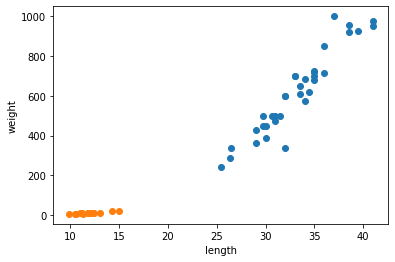

In [60]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)#도미
plt.scatter(smelt_length, smelt_weight)#빙어

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [61]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
#두 리스트 합치기

# 이 책에서 사용하는 머신러닝 패키지는 사이킷런이다. 
이 패키지를 사용하려면 각 특성의 리스트를 세로방향으로 늘어뜨린 2차원 리스트를 만들어야 한다.

또한 머신러닝 알고리즘이 알아들을 수 있도록 도미와 빙어를 숫자 1, 0으로 표현한다.

In [63]:
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [66]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# 사이킷런 패키지
이제 사이킷런 패키지에서 k-최근접 이웃 알고리즘을 구현한 클래스인 ***KNeighborsClassifier***를 임포트한다.

클래스의 객체를 만든 후, 이 객체에 fish_data와 fish_target을 전달하여 도미를 찾기 위한 기준을 학습시킨다.
이런 과정을 머신러닝에서는 **훈련**이라고 부른다.

**fit()** 메서드는 주어진 데이터로 알고리즘을 훈련시킨 뒤 훈련한다. 

사이킷런에서 모델을 평가하는 메서드는 **score()** 메서드이다. 이 메서드는 0 에서 1 사이의 값을 반환하며 1은 모든 데이터를 정확히 맞혔다는 것을 나타낸다. 이 값을 **정확도**라고 부른다

In [68]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

kn.score(fish_data, fish_target)

1.0

# k-최근접 이웃 알고리즘
앞에서 첫 번째 머신러닝 프로그램을 성공적으로 만들었다. 
여기에서 사용한 알고리즘은 k-최근접 이웃이다. 간단히 설명하면 어떤 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용한다. 

새로운 삼각형으로 표시된 데이터가 있다고 가정하면 이 삼각형은 도미와 빙어 중 어디에 속할까?

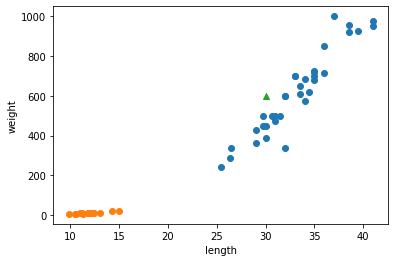

array([1])

In [70]:
plt.scatter(bream_length, bream_weight)#도미
plt.scatter(smelt_length, smelt_weight)#빙어
plt.scatter(30, 600, marker='^')

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

kn.predict([[30,600]]) #

predict() 메서드는 새로운 데이터의 정답을 예측한다. 결과를 보니 도미(1)를 반환한다. 